In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("Tweets.csv")
data = data[['airline_sentiment', 'text']]
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [3]:
data['airline_sentiment'].value_counts()

negative    8302
neutral     2947
positive    2260
Name: airline_sentiment, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [5]:
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
#Removing the noisy text
def noiseremoval_text(text):
  text = text.strip('@VirginAmerica')
  text = re.sub('\[[^]]*\] ', '', text)
  return text

In [8]:
#Apply function on review column
data['text']=data['text'].apply(noiseremoval_text)

In [9]:
data.head()

,airline_sentiment,text
0,neutral,What @dhepburn said.
1,positive,plus you've added commercials to the experien...
2,neutral,I didn't today... Must mean I need to take an...
3,negative,"it's really aggressive to blast obnoxious ""en..."
4,negative,and it's a really big bad thing about it


In [10]:
#lemmatize the text
def lem(text):
  lm = WordNetLemmatizer()
  text= ' '.join([lm.lemmatize(word) for word in text.split()])
  return text

In [11]:
data['text']=data['text'].apply(lem)

In [12]:
#set stopwords to english

stop_wr=set(stopwords.words('english'))

In [13]:
#removing the stopwords
def removing_stopwords(text, is_lower_case=False):
    #Tokenization of text
    tokenizers=ToktokTokenizer()
    #Setting English stopwords
    tokens = tokenizers.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filter_tokens = [token for token in tokens if token not in stop_wr]
    else:
        filter_tokens = [token for token in tokens if token.lower() not in stop_wr]
    filtered_text = ' '.join(filter_tokens)    
    return filtered_text

In [14]:
data['text']=data['text'].apply(removing_stopwords)

In [15]:
data.head()

,airline_sentiment,text
0,neutral,@dhepburn said .
1,positive,plus ' added commercial experience ... tacky .
2,neutral,' today ... Must mean need take another trip !
3,negative,"' really aggressive blast obnoxious "" entertai..."
4,negative,' really big bad thing


In [16]:
#split the dataset  
#train dataset
train_text_data=data.text[:9000]

In [17]:
#test dataset

test_text_data=data.text[9000:]

In [18]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train=cv.fit_transform(train_text_data)
#transformed test reviews
cv_test=cv.transform(test_text_data)

print('BOW_cv_train:',cv_train.shape)
print('BOW_cv_test:',cv_test.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (9000, 126056)
BOW_cv_test: (4509, 126056)


In [19]:
train_data=data.airline_sentiment[:9000]

In [20]:
test_data=data.airline_sentiment[9000:]

In [21]:
#training the model
logistic=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=logistic.fit(cv_train,train_data)
print(lr_bow)

LogisticRegression(C=1, max_iter=500, random_state=42)


In [22]:
#Predicting the model for bag of words
lr_bow_predict=logistic.predict(cv_test)


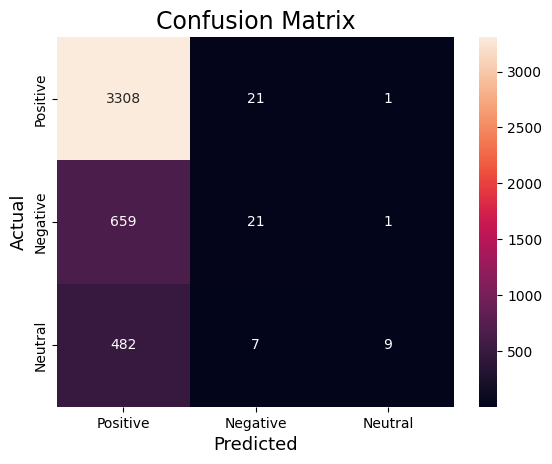

In [23]:
cm = confusion_matrix(test_data,lr_bow_predict)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative','Neutral'],
            yticklabels=['Positive','Negative','Neutral'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [24]:
print(classification_report(test_data, lr_bow_predict, digits=3))

              precision    recall  f1-score   support

    negative      0.744     0.993     0.850      3330
     neutral      0.429     0.031     0.058       681
    positive      0.818     0.018     0.035       498

    accuracy                          0.740      4509
   macro avg      0.663     0.347     0.314      4509
weighted avg      0.704     0.740     0.641      4509

